In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
train = pd.read_csv('../kaggle-toxicity/jigsaw-unintended-bias-in-toxicity-classification/train.csv')
print('loaded %d records' % len(train))

loaded 1804874 records


In [5]:
train.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [6]:
train =  train.fillna(0.0)

In [7]:
train.head(10)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [8]:
label_list = train.columns
print(label_list)

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')


In [61]:
minority_list = ['asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white']

In [10]:
label_list = minority_list
train_filtered = train.filter(items=label_list)
train_filtered.head()
train_filtered.shape

(1804874, 24)

In [11]:
train_filtered['count_minority'] = train_filtered['asian']
minority_count_list = []
for i in range(train_filtered.shape[0]):
    if i%100000==0: print(i)
    minority_count_list.append((len(pd.Series.nonzero(train_filtered.iloc[i])[0]), train.id.values[i]))

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000


In [30]:
train_filtered

,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,...,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,count_minority
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train_filtered.iloc[0].jewish

0.0

In [38]:
minority_count_list = []
for minority in minority_list:
    print(minority)
    print('\n')
    minority_common_ratio = []
    for minority_test in minority_list:
        if minority_test!=minority:
            print(minority_test)
            count = 0
            for i in range(train_filtered[train_filtered[minority_test]>0].shape[0]):
                if train_filtered.iloc[i][minority]!=0: count+=1
            minority_common_ratio.append(count/train_filtered[train_filtered[minority_test]>0].shape[0])
    minority_count_list.append(minority_common_ratio)
    print(minority_count_list)

asian


atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716]]
atheist


asian
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

physical_disability
psychiatric_or_mental_illness
transgender
white
[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.00

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

other_race_or_ethnicity


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

other_religion


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

other_sexual_orientation


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
physical_disability
psychiatric_or_mental_illness
transgender
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

physical_disability


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
psychiatric_or_mental_illness
transgender
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

psychiatric_or_mental_illness


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
transgender
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

transgender


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
white


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

white


asian
atheist
bisexual
black
buddhist
christian
female
heterosexual
hindu
homosexual_gay_or_lesbian
intellectual_or_learning_disability
jewish
latino
male
muslim
other_disability
other_gender
other_race_or_ethnicity
other_religion
other_sexual_orientation
physical_disability
psychiatric_or_mental_illness
transgender


[[0.002663115845539281, 0.003003003003003003, 0.00342483259213822, 0.0036603221083455345, 0.0024445893089960887, 0.002849776089021577, 0.0028960324355632784, 0.0032113037893384713, 0.0033318089762853598, 0.0033987915407854984, 0.0034846400733608437, 0.0034602076124567475, 0.002905997829855698, 0.0031144465290806754, 0.0028208744710860366, 0.003672420124862284, 0.0033921662161445912, 0.0035859431030360986, 0.002883762200532387, 0.0030988534242330336, 0.0035630567276136896, 0.003594771241830065, 0.0030052090289835716], [0.002460136674259681, 0.004204204204204204, 0.001737974748249246, 0.0021961932650073207, 0.001271186440677966, 0.0011399104356086308, 0.00405444540978859, 0.00449582530507386, 0.0018292284575684328, 0.004531722054380665, 0.0024759284731774417, 0.0028835063437139563, 0.0010601279636812632, 0.0016135084427767355, 0.004231311706629055, 0.0044069041498347415, 0.0017490857051995548, 0.0017332058331341142, 0.0037710736468500442, 0.004338394793926247, 0.002531645569620253, 0.003

In [12]:
minority_count_list_filtered = [value for value in minority_count_list if value[0]>0]
minority_count_list_filtered

[(1, 59856),
 (1, 239579),
 (2, 239607),
 (1, 239612),
 (2, 239653),
 (1, 239669),
 (1, 239752),
 (1, 239787),
 (2, 239852),
 (2, 239853),
 (1, 239893),
 (1, 239904),
 (3, 239907),
 (1, 239917),
 (1, 239921),
 (1, 239959),
 (2, 239980),
 (1, 240022),
 (2, 240028),
 (2, 240035),
 (1, 240042),
 (3, 240059),
 (2, 240290),
 (1, 240318),
 (2, 240493),
 (2, 240528),
 (2, 240574),
 (1, 240581),
 (1, 240588),
 (2, 240613),
 (1, 240616),
 (3, 240627),
 (1, 240700),
 (1, 240716),
 (1, 240770),
 (1, 240813),
 (2, 240845),
 (2, 240855),
 (2, 240878),
 (1, 240880),
 (2, 240969),
 (3, 240978),
 (2, 240985),
 (2, 240989),
 (1, 241063),
 (1, 241071),
 (2, 241074),
 (4, 241097),
 (1, 241110),
 (1, 241121),
 (2, 241130),
 (1, 241132),
 (3, 241137),
 (1, 241148),
 (2, 241235),
 (2, 241239),
 (1, 241240),
 (2, 241241),
 (1, 241244),
 (1, 241275),
 (1, 241282),
 (2, 241294),
 (1, 241296),
 (2, 241395),
 (3, 241658),
 (2, 241668),
 (1, 241699),
 (1, 241707),
 (1, 241712),
 (1, 241724),
 (2, 241735),
 (1, 24

In [13]:
from collections import Counter
Counter(elem[0] for elem in minority_count_list)

Counter({0: 1578640,
         1: 111043,
         2: 67072,
         3: 27893,
         4: 11129,
         5: 4880,
         14: 27,
         8: 440,
         6: 2219,
         7: 1078,
         9: 197,
         10: 78,
         15: 27,
         16: 21,
         12: 31,
         13: 27,
         11: 54,
         19: 5,
         17: 5,
         18: 6,
         22: 1,
         21: 1})

In [14]:
minority_count_list_filtered = [value for value in minority_count_list if value[0]>15]
minority_count_list_filtered

[(16, 264044),
 (19, 284485),
 (17, 289840),
 (19, 357424),
 (16, 363989),
 (19, 364972),
 (16, 383270),
 (17, 390262),
 (18, 414822),
 (16, 581559),
 (17, 606346),
 (22, 690975),
 (17, 967809),
 (19, 1070933),
 (16, 4997559),
 (18, 5028852),
 (16, 5088943),
 (21, 5095610),
 (16, 5118493),
 (16, 5131315),
 (16, 5351737),
 (16, 5397701),
 (18, 5418323),
 (16, 5467098),
 (16, 5482007),
 (18, 5513645),
 (16, 5736433),
 (16, 5803930),
 (16, 5815436),
 (18, 5839160),
 (16, 5861938),
 (17, 6006389),
 (16, 6057197),
 (16, 6059596),
 (16, 6136387),
 (16, 6147507),
 (19, 6263777),
 (16, 6279783),
 (18, 6306106)]

In [15]:
train['count_minority'] = [elem[0] for elem in minority_count_list]

In [16]:
for comment in train[train['count_minority']>15].comment_text.values:
    print(comment)
    print('\n')

So what do we do with those among us who are unlucky enough to be born with physical, mental or intellectual disabilities and cannot "make your own money?"  Or those of us who become disabled and cannot go back to work or afford the medical bills? Or children orphaned before they are old enough to support themselves but relatives cannot afford to take them in?  Let them starve or freeze to death or beg on the streets?  Sometimes a lack of personal responsibility is not the problem.


I suggest you do that very thing. My home computer is a cheap laptop, and resides in Betverton, Oregon and not NE Portland. I find if hilarious that you cannot accept that a white woman and black man can be friends without having a sexual relationship. This confirms your overal mediocrity. So, yeah, check me out. You'll find that I post from my laptop and cellphone, niether of which have ever been in Fred's house. LMAO...:)


Yes, that is what I am saying. What significance at all does it matter if if she 

In [17]:
from matplotlib import pyplot as plt
plt.figure(1)
plt.hist(train.target.values,bins=15)
plt.show()

<Figure size 640x480 with 1 Axes>

In [18]:
minority_count_list_value_filter = [elem[0] for elem in minority_count_list if elem[0]>-1]

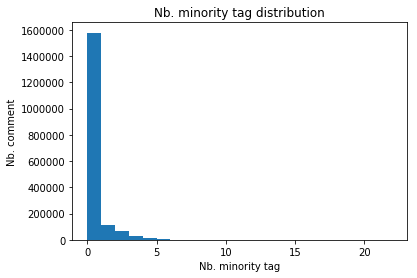

In [29]:
plt.figure(1)
plt.hist(minority_count_list_value_filter,bins=22)
plt.xlabel('Nb. minority tag')
plt.ylabel('Nb. comment')
plt.title('Nb. minority tag distribution')
plt.show()

In [20]:
list_minority_count = []
for minority in minority_list:
    list_minority_count.append((train[train[minority] > 0].shape[0],minority))

In [21]:
list_minority_count_sort = sorted(list_minority_count, key = lambda x: x[0], reverse=True)

In [22]:
print(list_minority_count_sort)

[(80179, 'male'), (73690, 'female'), (61360, 'christian'), (29948, 'white'), (26650, 'muslim'), (19563, 'black'), (18867, 'other_race_or_ethnicity'), (16732, 'other_religion'), (15307, 'homosexual_gay_or_lesbian'), (10975, 'asian'), (10905, 'jewish'), (10665, 'psychiatric_or_mental_illness'), (6936, 'latino'), (6120, 'transgender'), (4508, 'other_sexual_orientation'), (3545, 'other_disability'), (3453, 'heterosexual'), (3330, 'bisexual'), (3227, 'physical_disability'), (2723, 'other_gender'), (2648, 'intellectual_or_learning_disability'), (2253, 'atheist'), (1557, 'hindu'), (1366, 'buddhist')]


In [23]:
ratio_toxicity_minority_list= []
for index,minority in enumerate(minority_list):
    train_minority = train[train[minority]>0]
    size_minority = train_minority.shape[0]
    ratio = train_minority.target.values.mean()
    nb_toxic = train_minority[train_minority.target>0.5].shape[0]
    nb_non_toxic = train_minority[train_minority.target<0.5].shape[0]
    ratio_toxicity_minority_list.append((minority,ratio,nb_toxic,nb_non_toxic,size_minority))
    
ratio_toxicity_minority_list_sorted = sorted(ratio_toxicity_minority_list,key=lambda x: -x[4])
ratio_toxicity_minority_list_sorted

[('male', 0.17632036611499413, 8284, 68382, 80179),
 ('female', 0.17308306939633727, 7215, 63264, 73690),
 ('christian', 0.13041887730879986, 3418, 55915, 61360),
 ('white', 0.28412818356604236, 5350, 22135, 29948),
 ('muslim', 0.24743516632768334, 3731, 21007, 26650),
 ('black', 0.29238429896513674, 3745, 14097, 19563),
 ('other_race_or_ethnicity', 0.17781430194370257, 1767, 16169, 18867),
 ('other_religion', 0.16140883733312195, 1288, 14710, 16732),
 ('homosexual_gay_or_lesbian', 0.27673833186401364, 2612, 11459, 15307),
 ('asian', 0.14879181596142832, 819, 9746, 10975),
 ('jewish', 0.19568093928758792, 1028, 9290, 10905),
 ('psychiatric_or_mental_illness', 0.23604677790264278, 1802, 8253, 10665),
 ('latino', 0.1879016433890461, 747, 5813, 6936),
 ('transgender', 0.21365797270128992, 685, 5038, 6120),
 ('other_sexual_orientation', 0.21401520466574137, 547, 3697, 4508),
 ('other_disability', 0.16472473908112065, 311, 3088, 3545),
 ('heterosexual', 0.24113875489739034, 464, 2735, 3453)

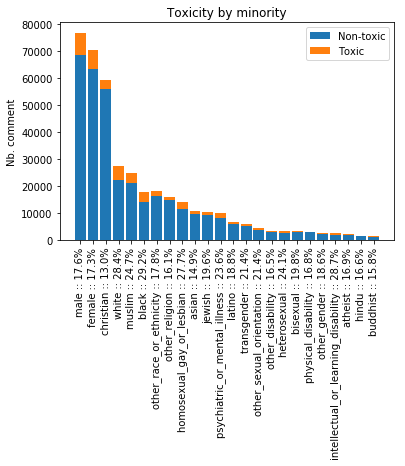

In [28]:
N = len(ratio_toxicity_minority_list_sorted)
toxicity_list = tuple([elem[2] for elem in ratio_toxicity_minority_list_sorted])
non_toxicity_list = tuple([elem[3] for elem in ratio_toxicity_minority_list_sorted])

ind = np.arange(N)    # the x locations for the groups
width = 0.85       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, non_toxicity_list, width)
p2 = plt.bar(ind, toxicity_list, width,bottom=non_toxicity_list)

plt.ylabel('Nb. comment')
plt.title('Toxicity by minority')
plt.xticks(ind, tuple([elem[0]+' :: '+str(np.round(elem[1]*100,1))+'%' for elem in ratio_toxicity_minority_list_sorted]),  rotation=90)
plt.yticks(np.arange(0, 80179, 10000))
plt.legend((p1[0], p2[0]), ('Non-toxic', 'Toxic'))

plt.show()

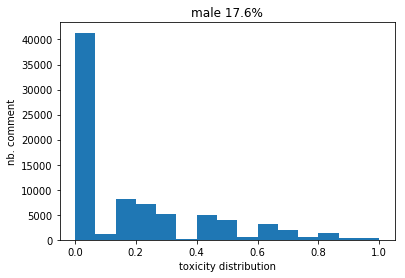

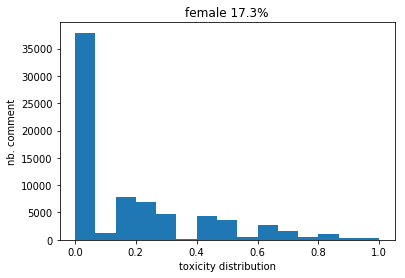

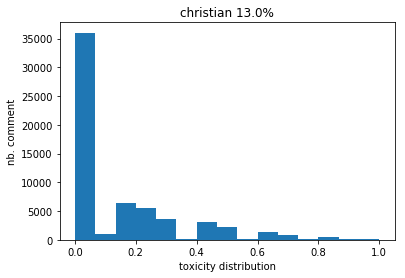

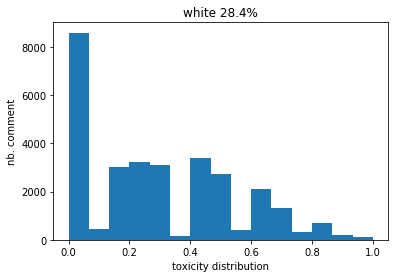

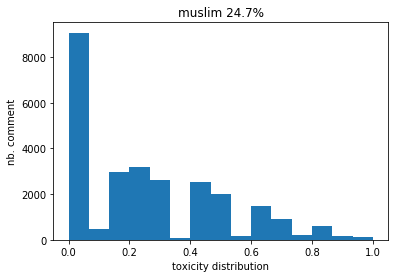

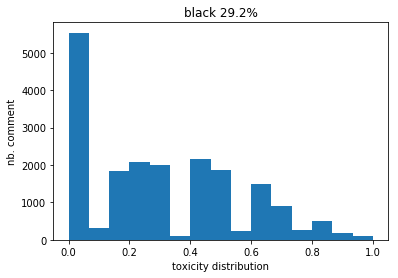

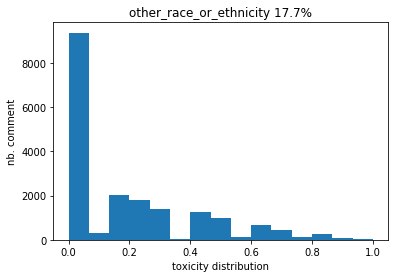

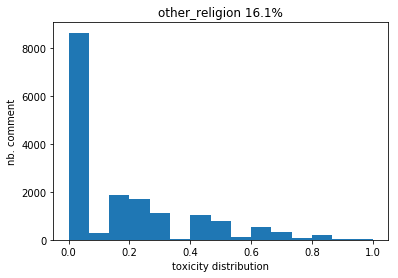

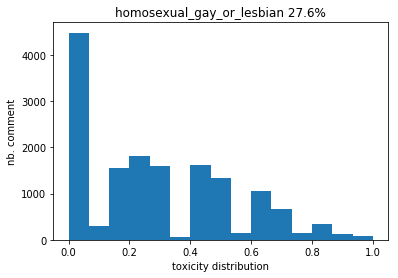

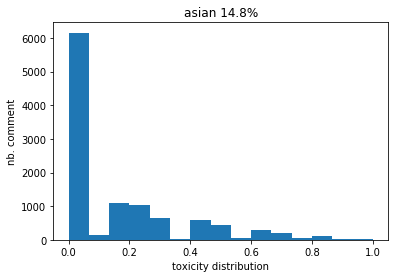

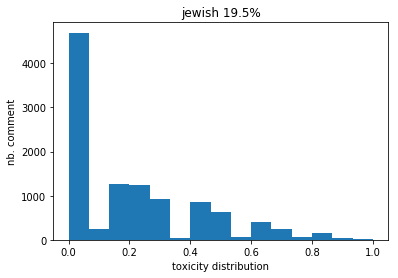

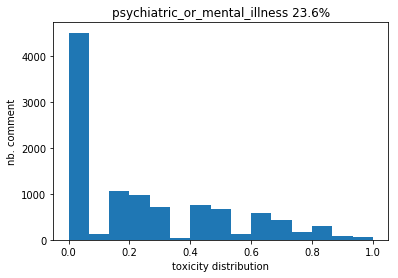

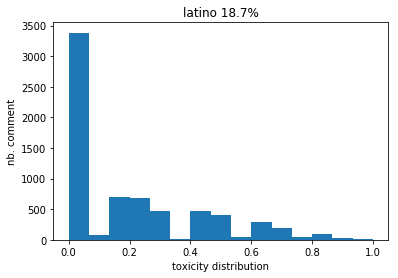

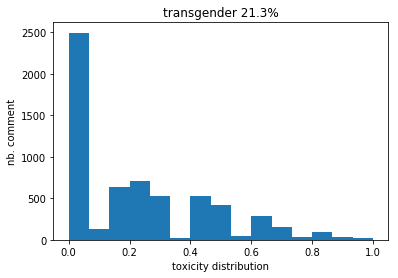

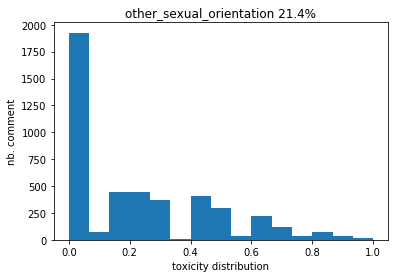

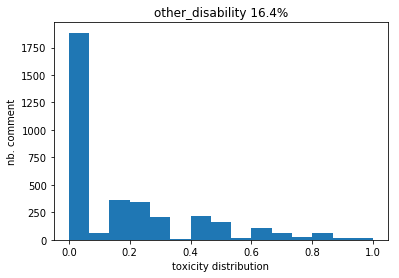

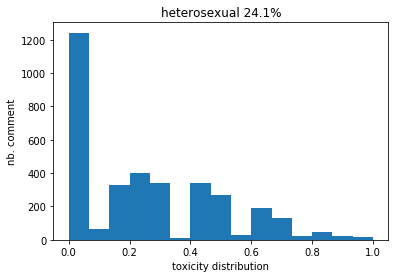

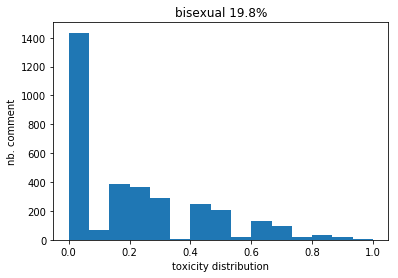

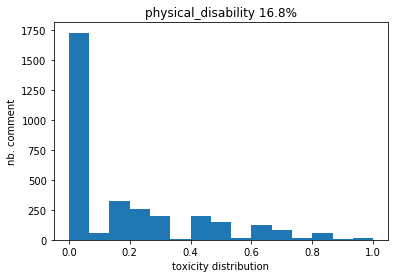

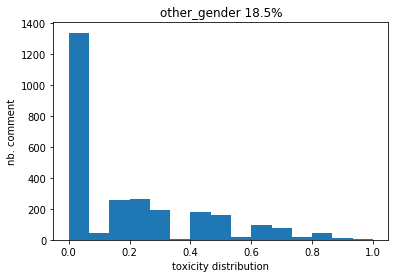

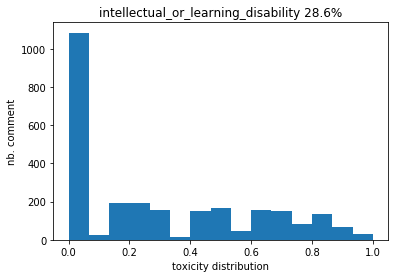

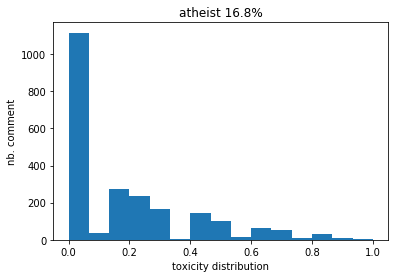

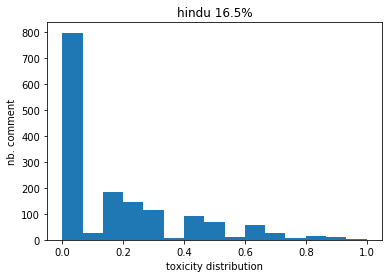

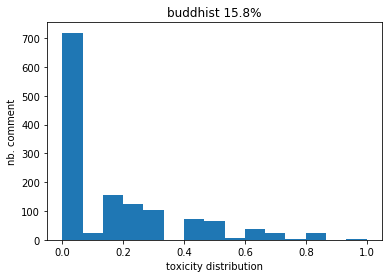

In [25]:
for index, (minority, minority_ratio, nb_toxic, nb_non_toxic, total) in enumerate(ratio_toxicity_minority_list_sorted):
    train_minority = train[train[minority]>0]
    plt.figure(index)
    plt.title(minority+' '+str(int(minority_ratio*1000)/10)+'%')
    plt.hist(train_minority.target.values,bins=15)
    plt.xlabel('toxicity distribution')
    plt.ylabel('nb. comment')
    plt.show()

In [26]:
import os
import json
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from datetime import *
from gensim.test.utils import get_tmpfile
import spacy
import csv
from os import listdir
from os.path import isfile, join
from multiprocessing import Pool

In [41]:
train

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,count_minority
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.000000,0,4,0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.000000,0,4,0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.000000,0,4,0
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.000000,0,4,0
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.000000,...,rejected,0,0,0,1,0,0.000000,4,47,1
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.009524,0,105,0
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.220339,0,59,0
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,rejected,0,0,0,0,0,0.000000,0,4,0
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,approved,0,0,0,0,0,0.000000,0,4,0
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,approved,0,0,0,1,0,0.000000,0,4,0


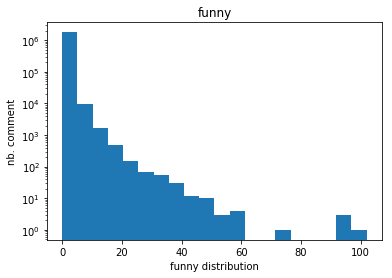

<Figure size 432x288 with 0 Axes>

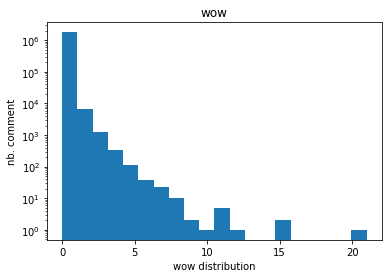

<Figure size 432x288 with 0 Axes>

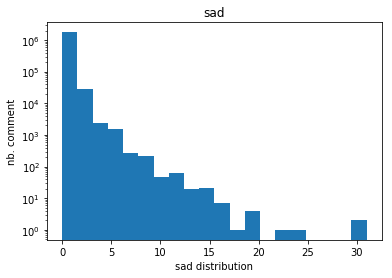

<Figure size 432x288 with 0 Axes>

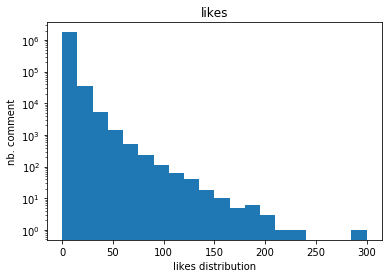

<Figure size 432x288 with 0 Axes>

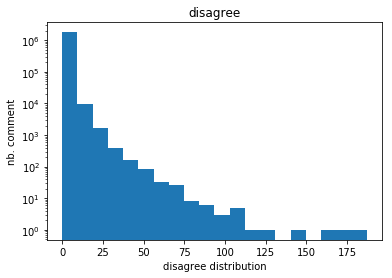

<Figure size 432x288 with 0 Axes>

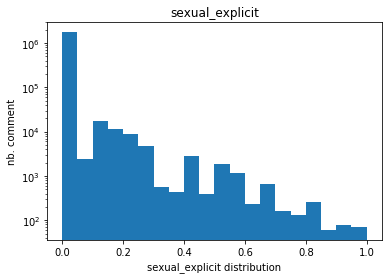

<Figure size 432x288 with 0 Axes>

In [49]:
i=0
for label in ['funny','wow','sad','likes','disagree','sexual_explicit']:  
    i+=1
    plt.figure(i)
    plt.title(label)
    plt.hist(train[label].values[:],bins=20)
    plt.xlabel(label+' distribution')
    plt.ylabel('nb. comment')
    plt.yscale('log')
    plt.show()


In [50]:
minority_count_list

[[0.002663115845539281,
  0.003003003003003003,
  0.00342483259213822,
  0.0036603221083455345,
  0.0024445893089960887,
  0.002849776089021577,
  0.0028960324355632784,
  0.0032113037893384713,
  0.0033318089762853598,
  0.0033987915407854984,
  0.0034846400733608437,
  0.0034602076124567475,
  0.002905997829855698,
  0.0031144465290806754,
  0.0028208744710860366,
  0.003672420124862284,
  0.0033921662161445912,
  0.0035859431030360986,
  0.002883762200532387,
  0.0030988534242330336,
  0.0035630567276136896,
  0.003594771241830065,
  0.0030052090289835716],
 [0.002460136674259681,
  0.004204204204204204,
  0.001737974748249246,
  0.0021961932650073207,
  0.001271186440677966,
  0.0011399104356086308,
  0.00405444540978859,
  0.00449582530507386,
  0.0018292284575684328,
  0.004531722054380665,
  0.0024759284731774417,
  0.0028835063437139563,
  0.0010601279636812632,
  0.0016135084427767355,
  0.004231311706629055,
  0.0044069041498347415,
  0.0017490857051995548,
  0.00173320583313

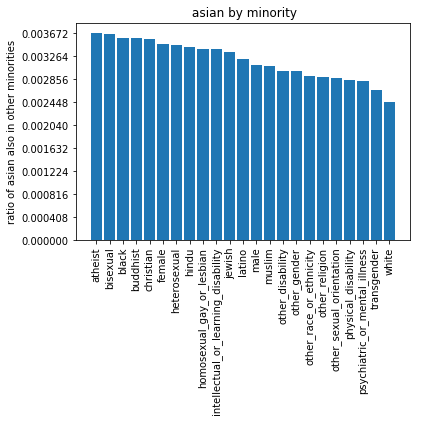

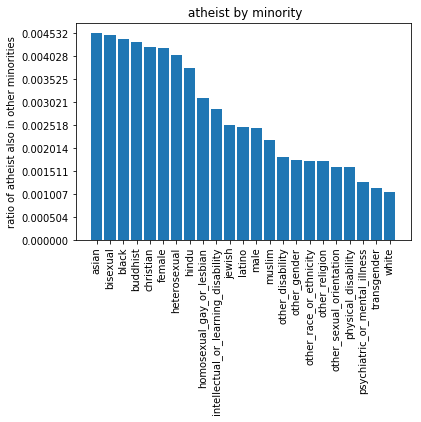

<Figure size 432x288 with 0 Axes>

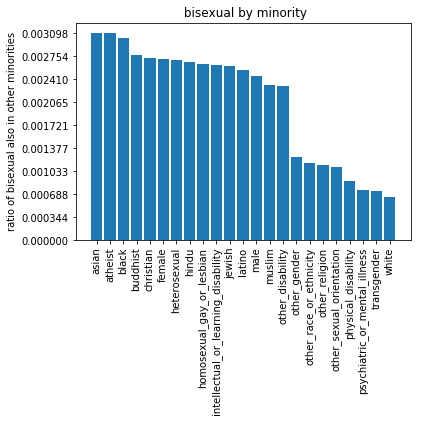

<Figure size 432x288 with 0 Axes>

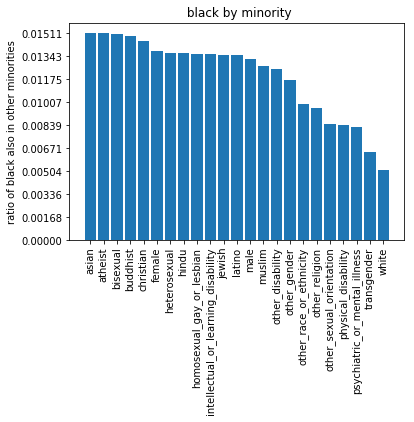

<Figure size 432x288 with 0 Axes>

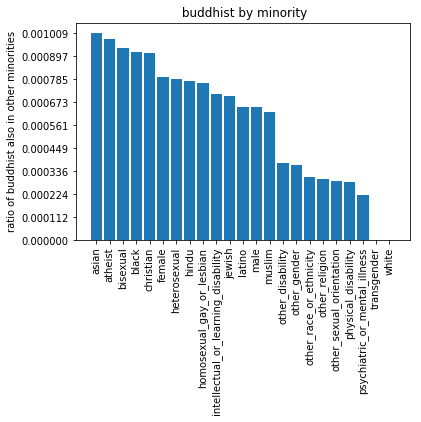

<Figure size 432x288 with 0 Axes>

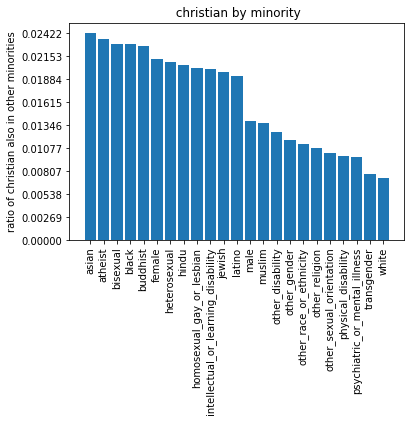

<Figure size 432x288 with 0 Axes>

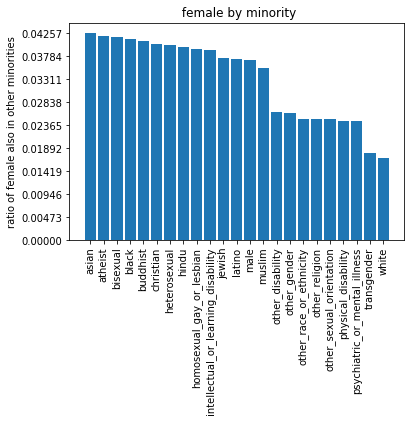

<Figure size 432x288 with 0 Axes>

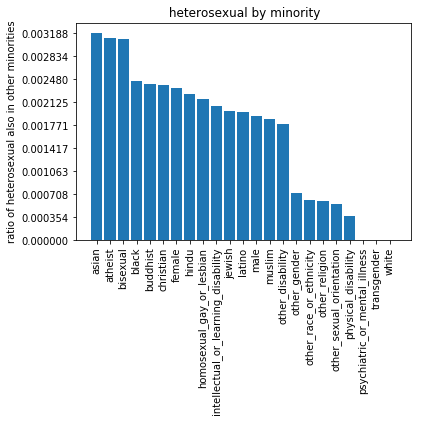

<Figure size 432x288 with 0 Axes>

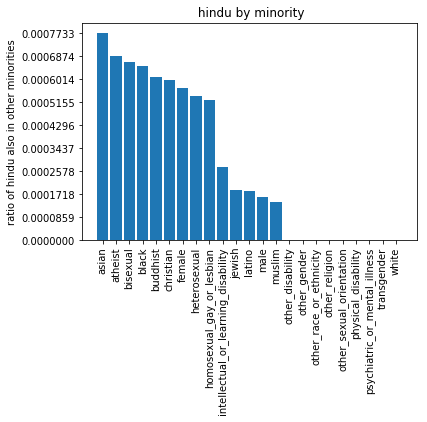

<Figure size 432x288 with 0 Axes>

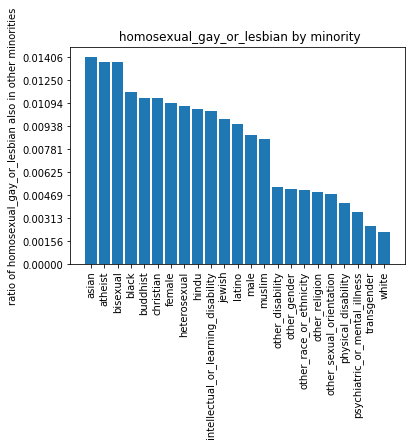

<Figure size 432x288 with 0 Axes>

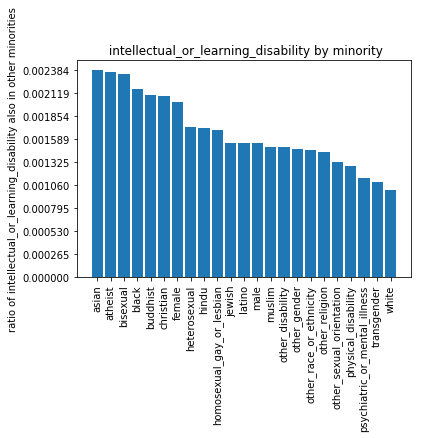

<Figure size 432x288 with 0 Axes>

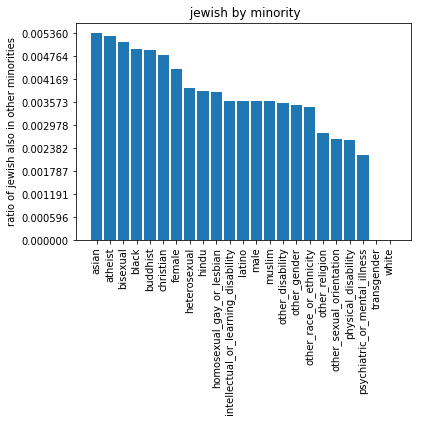

<Figure size 432x288 with 0 Axes>

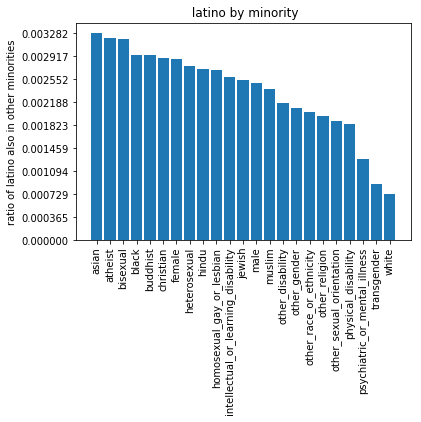

<Figure size 432x288 with 0 Axes>

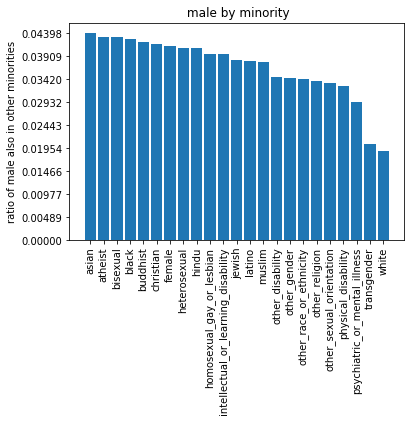

<Figure size 432x288 with 0 Axes>

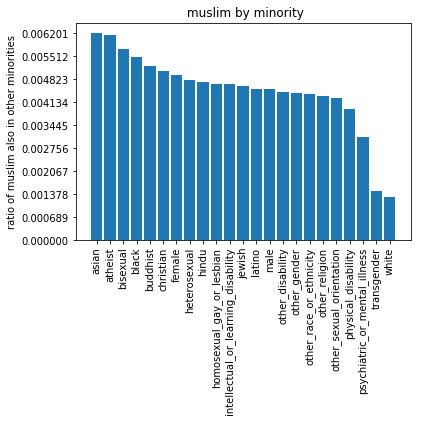

<Figure size 432x288 with 0 Axes>

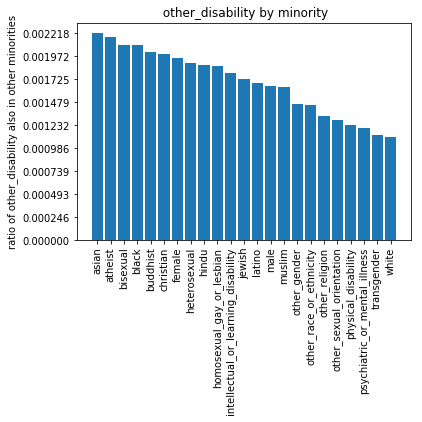

<Figure size 432x288 with 0 Axes>

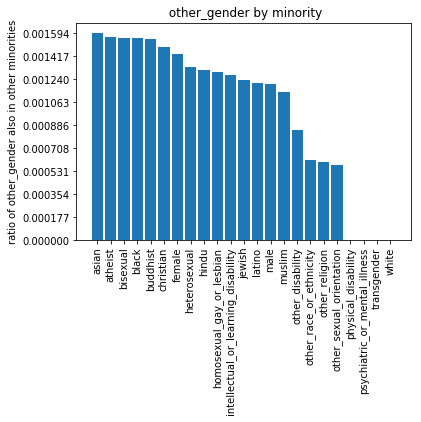

<Figure size 432x288 with 0 Axes>

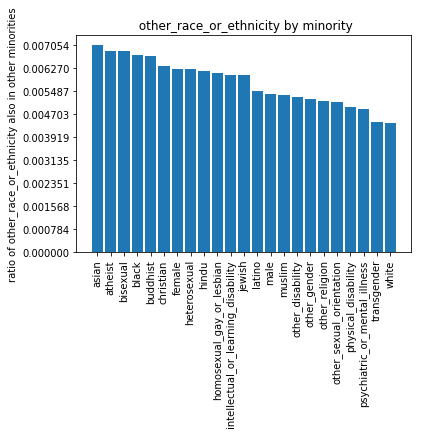

<Figure size 432x288 with 0 Axes>

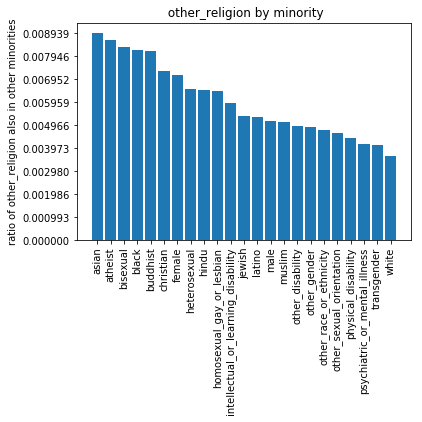

<Figure size 432x288 with 0 Axes>

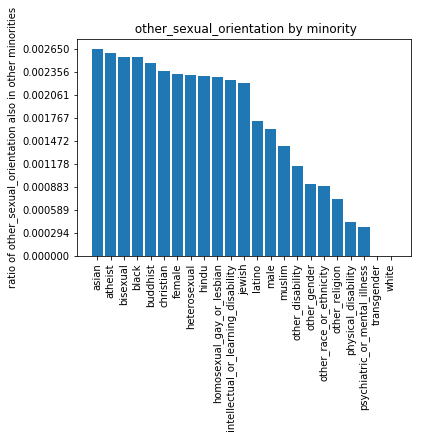

<Figure size 432x288 with 0 Axes>

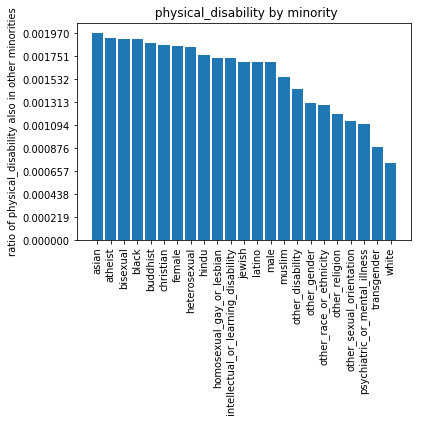

<Figure size 432x288 with 0 Axes>

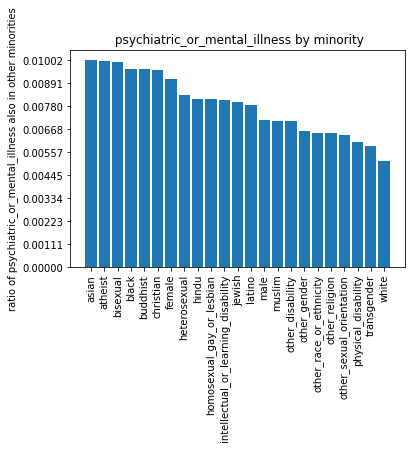

<Figure size 432x288 with 0 Axes>

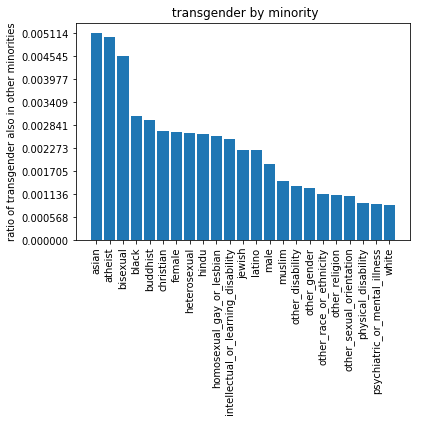

<Figure size 432x288 with 0 Axes>

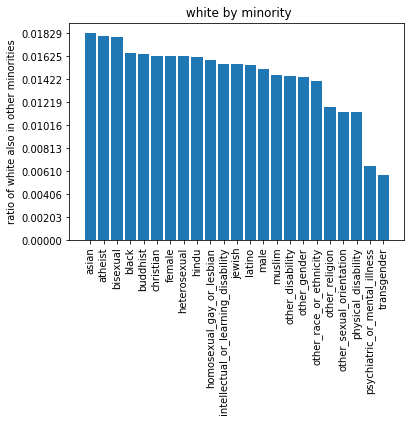

<Figure size 432x288 with 0 Axes>

In [84]:
import pylab
for index, minority in enumerate(minority_list):
    #print(minority)
    #print(minority_count_list[index])
    #print('\n')
    fig = plt.figure(index)
    N = len(ratio_toxicity_minority_list_sorted)-1
    common_ratio_list = tuple(sorted(minority_count_list[index],key=lambda x : -x))
    other_minority_list = list(np.copy(minority_list))
    other_minority_list.remove(minority)
    
    ind = np.arange(N)    # the x locations for the groups
    width = 0.85       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, common_ratio_list, width)

    plt.ylabel('ratio of '+minority+' also in other minorities')
    plt.title(' '+str(minority)+' by minority')
    plt.xticks(ind, tuple(other_minority_list),  rotation=90)
    plt.yticks(np.linspace(0, np.max(minority_count_list[index]),10))

    plt.show()
    plt.savefig('barplots/'+minority+'_common_ratio_barplot.jpg', dpi=100)

In [69]:
other_minority_list